In [ ]:
### Ensemble 7
### Timespan: 10000 years
### Timestep: 1 year
### 360 runs
### No prokaryotes, try to find reference scenarios that give the right distribution of ligands and iron
### Parameters that are varied: ligand lifetime, ligphi, deep box lifetime factor
### beta = 9

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
from matplotlib.colors import ListedColormap
plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()

'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble7'

In [2]:
data = pd.read_csv('Ensemble7_noprokaryotes.csv', sep=' ')

In [3]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,30000.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.053613,2210.529155,2399.529389,2395.325969,2399.540824,273.415838,280.771962,197.477084,0.0,333.0
1,30001.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.053300,2210.544942,2399.529064,2395.325567,2399.540827,273.416587,280.771797,197.497539,0.0,333.0
2,30002.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.052917,2210.566729,2399.528659,2395.325066,2399.540832,273.417703,280.771602,197.525774,0.0,333.0
3,30003.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.049928,2210.742215,2399.525482,2395.321135,2399.540869,273.426857,280.770099,197.753395,0.0,333.0
4,30004.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.046356,2210.959979,2399.521659,2395.316407,2399.540914,273.438445,280.768324,198.036357,0.0,333.0


In [4]:
data.shape

(360, 45)

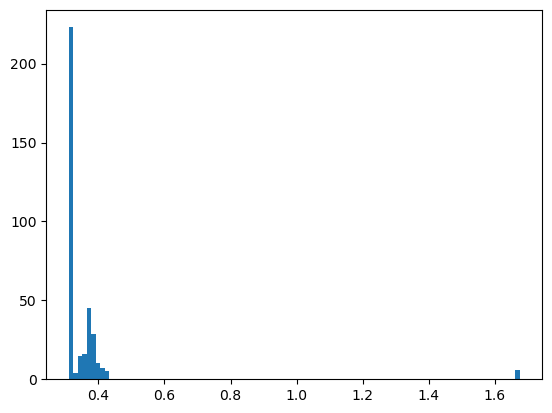

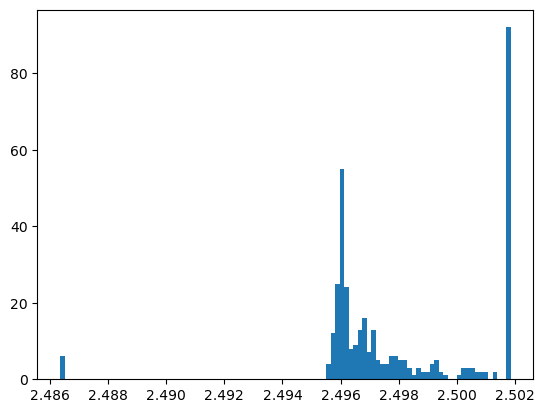

In [5]:
### Look at the distribution of PO4(2), PO4(3)

plt.hist(data['PO4(2)'], bins=100)
plt.show()

plt.hist(data['PO4(3)'], bins=100)
plt.show()



In [6]:
### Select all the runs that have Lig(1), Lig(2), Lig(3) bigger than 0.5 and smaller than 6

data_sel = data[(data['Lig(1)'] > 0.5) & (data['Lig(2)'] > 0.5) & (data['Lig(3)'] > 0.5)]
data_sel = data_sel[(data_sel['Lig(1)'] < 6) & (data_sel['Lig(2)'] < 6) & (data_sel['Lig(3)'] < 6)]
data_sel.shape

(50, 45)

Text(0.5, 1.0, 'Fe(1) distribution')

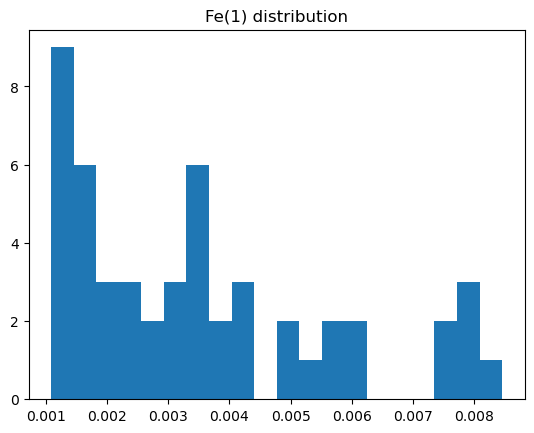

In [10]:
### Look at distribtution of Fe(1)

plt.hist(data_sel['Fe(1)'], bins=20)
plt.title('Fe(1) distribution')

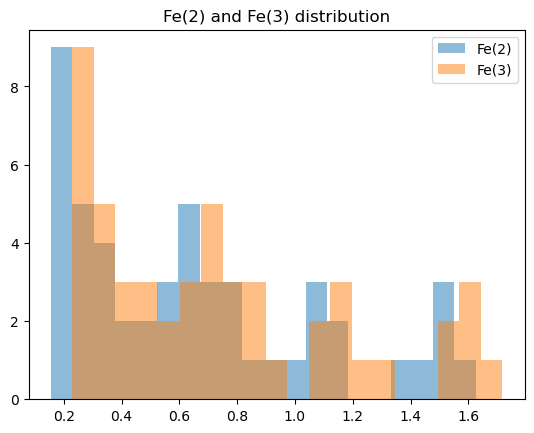

In [9]:
### Look at distribution of Fe(2) and Fe(3) in one histogram

plt.hist(data_sel['Fe(2)'], bins=20, alpha=0.5, label='Fe(2)')
plt.hist(data_sel['Fe(3)'], bins=20, alpha=0.5, label='Fe(3)')
plt.title('Fe(2) and Fe(3) distribution')
plt.legend()

### Deep Fe is shifted to higher values

In [11]:
### Select all the runs that have Fe(3) bigger than 0.2 and smaller than 2

data_sel = data_sel[(data_sel['Fe(3)'] > 0.2) & (data_sel['Fe(3)'] < 2)]
data_sel.shape

(50, 45)

In [14]:
print('Ligphi', data_sel['ligphi'].value_counts(normalize=True))
print('Ligand lifetime', data_sel['lt_lifet'].value_counts(normalize=True))
print('Deep box lifetime factor', data_sel['lt_deepf'].value_counts(normalize=True))


Ligphi 1.000000e-06    0.22
5.000000e-07    0.22
1.000000e-07    0.16
1.000000e-08    0.10
5.000000e-08    0.10
5.000000e-06    0.08
1.000000e-05    0.08
5.000000e-05    0.04
Name: ligphi, dtype: float64
Ligand lifetime 3.153600e+10    0.42
3.153600e+09    0.22
1.576800e+09    0.14
3.153600e+08    0.10
1.576800e+08    0.08
3.153600e+07    0.04
Name: lt_lifet, dtype: float64
Deep box lifetime factor 1000.0    0.34
100.0     0.26
50.0      0.20
10.0      0.12
5.0       0.06
1.0       0.02
Name: lt_deepf, dtype: float64


In [17]:
### Provide the id of the selected runs and print them out in a readable format

print(data_sel['id'].values)

[30046. 30047. 30095. 30099. 30100. 30101. 30149. 30153. 30154. 30155.
 30160. 30197. 30201. 30202. 30203. 30207. 30208. 30209. 30245. 30251.
 30256. 30257. 30261. 30262. 30263. 30266. 30267. 30268. 30269. 30302.
 30303. 30304. 30305. 30308. 30309. 30310. 30311. 30313. 30314. 30315.
 30316. 30317. 30319. 30320. 30321. 30322. 30323. 30324. 30325. 30326.]


In [31]:
### Cluster the runs by Ligphi, ligand lifetime, deep box lifetime factor

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(data_sel[['ligphi', 'lt_lifet', 'lt_deepf']])



c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


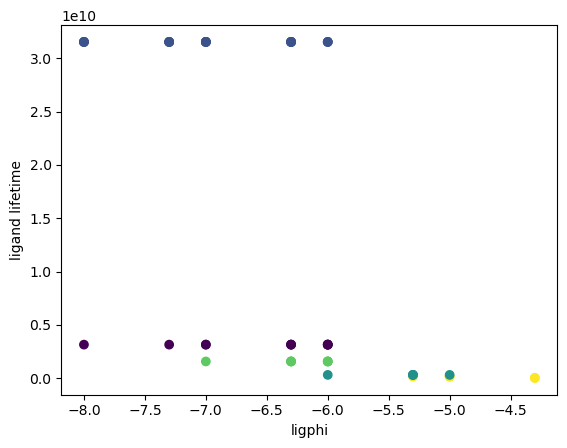

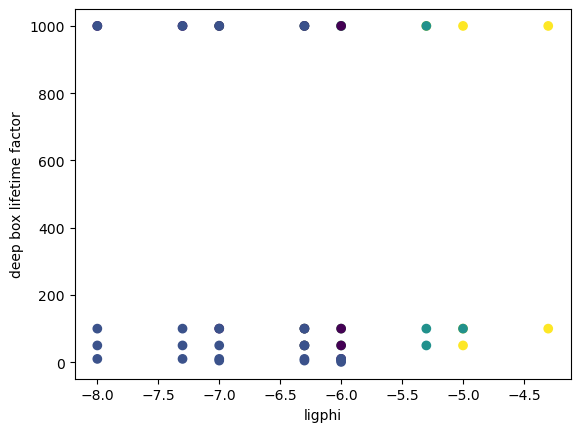

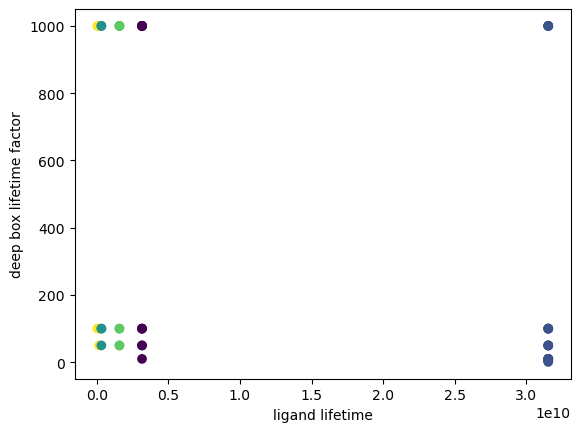

In [48]:
### Plot the clusters

plt.scatter(np.log10(np.array(data_sel['ligphi'])), data_sel['lt_lifet'], c=kmeans.labels_)
plt.xlabel('ligphi')
plt.ylabel('ligand lifetime')
plt.show()

plt.scatter(np.log10(np.array(data_sel['ligphi'])), data_sel['lt_deepf'], c=kmeans.labels_)
plt.xlabel('ligphi')
plt.ylabel('deep box lifetime factor')
plt.show()

plt.scatter(data_sel['lt_lifet'], data_sel['lt_deepf'], c=kmeans.labels_)
plt.xlabel('ligand lifetime')
plt.ylabel('deep box lifetime factor')
plt.show()


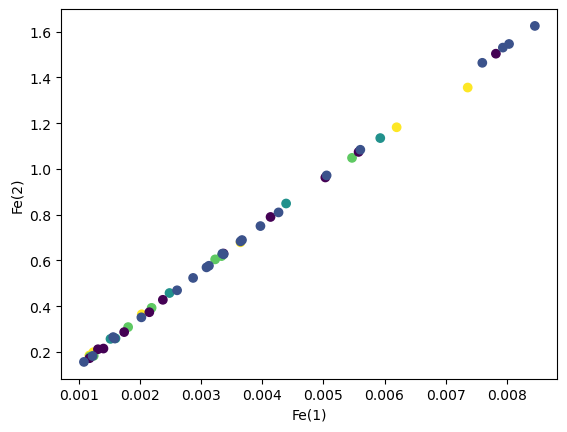

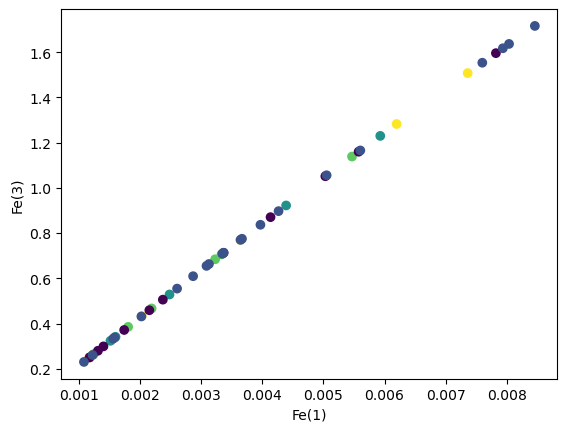

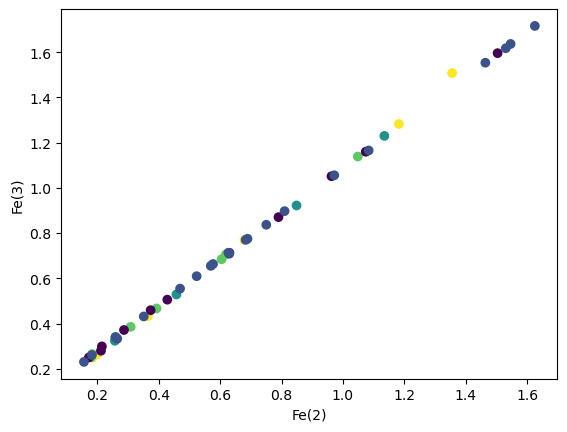

In [33]:
### Plot the clusters

plt.scatter(data_sel['Fe(1)'], data_sel['Fe(2)'], c=kmeans.labels_)
plt.xlabel('Fe(1)')
plt.ylabel('Fe(2)')
plt.show()

plt.scatter(data_sel['Fe(1)'], data_sel['Fe(3)'], c=kmeans.labels_)
plt.xlabel('Fe(1)')
plt.ylabel('Fe(3)')
plt.show()


plt.scatter(data_sel['Fe(2)'], data_sel['Fe(3)'], c=kmeans.labels_)
plt.xlabel('Fe(2)')
plt.ylabel('Fe(3)')
plt.show()

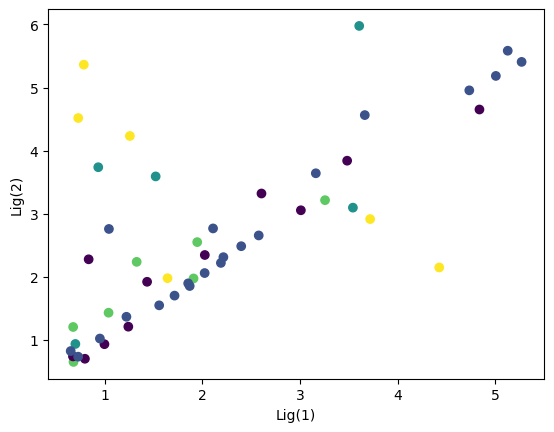

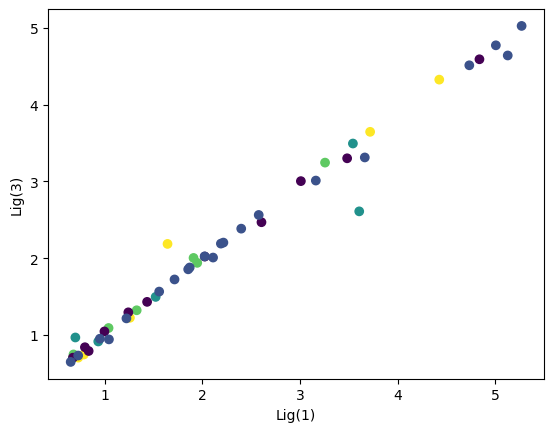

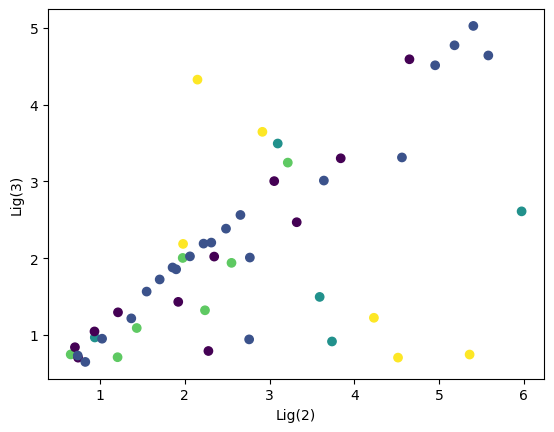

In [34]:
### Plot the clusters

plt.scatter(data_sel['Lig(1)'], data_sel['Lig(2)'], c=kmeans.labels_)
plt.xlabel('Lig(1)')
plt.ylabel('Lig(2)')
plt.show()

plt.scatter(data_sel['Lig(1)'], data_sel['Lig(3)'], c=kmeans.labels_)
plt.xlabel('Lig(1)')
plt.ylabel('Lig(3)')
plt.show()

plt.scatter(data_sel['Lig(2)'], data_sel['Lig(3)'], c=kmeans.labels_)
plt.xlabel('Lig(2)')
plt.ylabel('Lig(3)')
plt.show()

### add legend to the plots that show the clusters






In [69]:
from sklearn_extra.cluster import KMedoids

# Extract input data
X = data_sel[['ligphi', 'lt_lifet', 'lt_deepf']].values

num_clusters = 5

kmedoids = KMedoids(n_clusters=num_clusters, random_state=0).fit(X)

medoid_indices = kmedoids.medoid_indices_

representative_sets = pd.DataFrame(X[medoid_indices], columns=['ligphi', 'lt_lifet', 'lt_deepf'])


c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 4 is empty! self.labels_[self.medoid_indices_[4]] may not be labeled with its corresponding cluster (4).
  warnings.warn(


In [84]:
medoid_indices

array([18, 31, 23,  8, 26], dtype=int64)

In [85]:
print(representative_sets)

         ligphi      lt_lifet  lt_deepf
0  1.000000e-08  3.153600e+09    1000.0
1  1.000000e-08  3.153600e+10     100.0
2  5.000000e-07  3.153600e+09     100.0
3  5.000000e-06  3.153600e+08     100.0
4  1.000000e-06  3.153600e+09      50.0


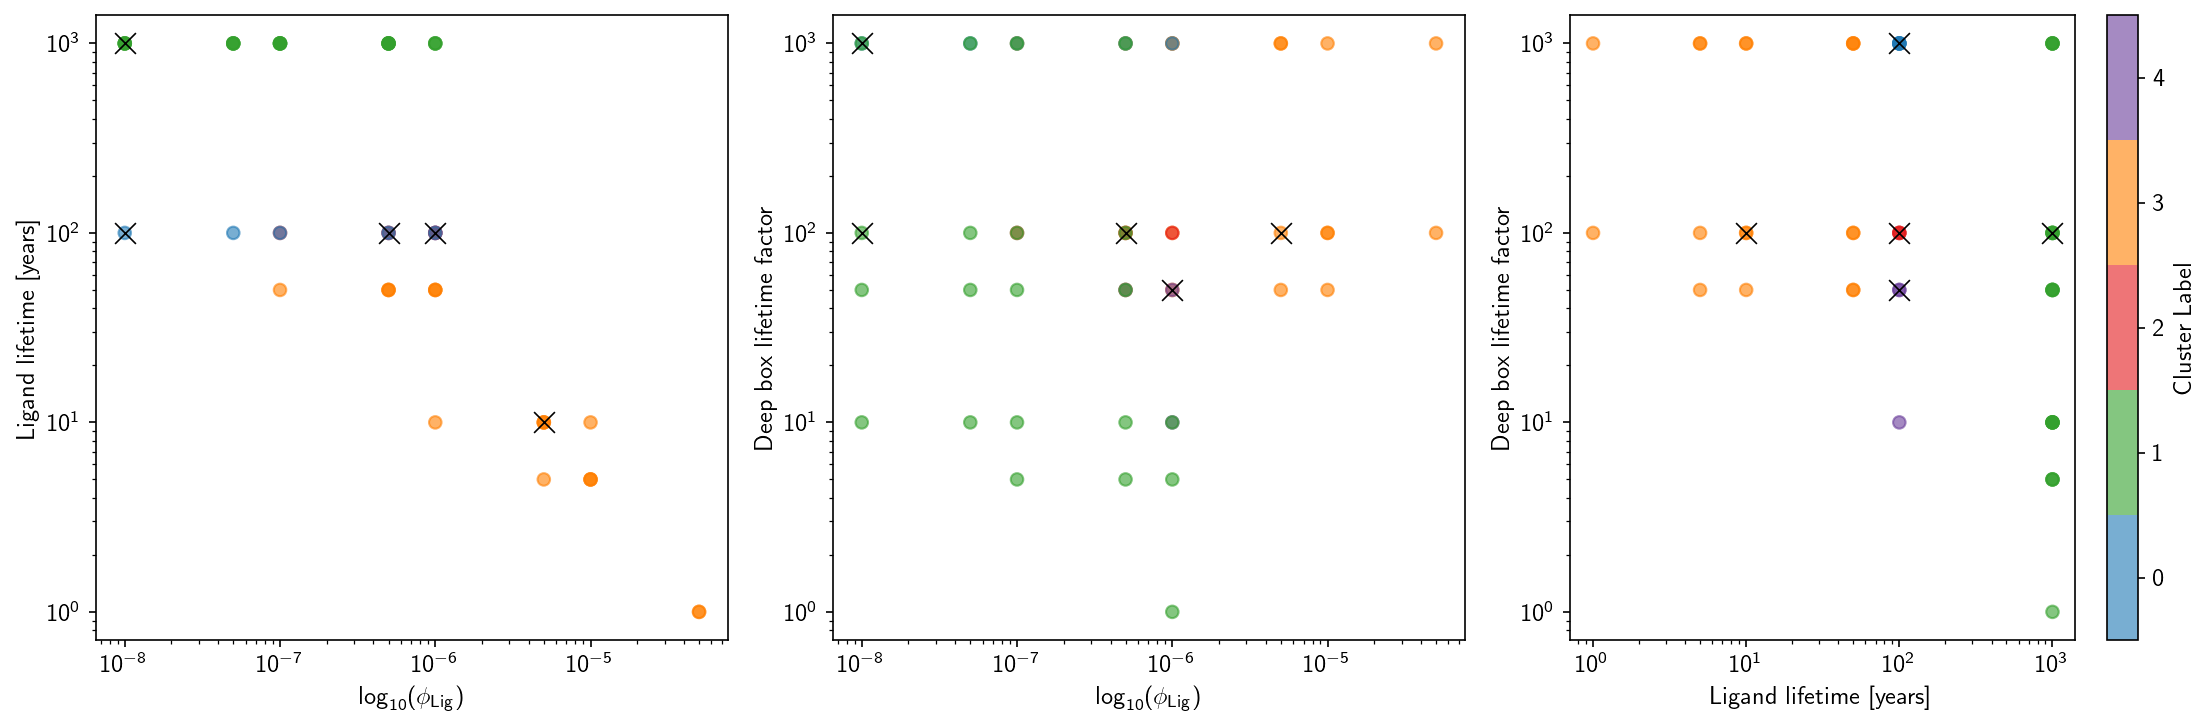

In [117]:

# Assuming kmedoids.labels_ contains the cluster labels

# Create a custom colormap with 5 visually attractive colors
custom_cmap = ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'])

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=150)

# Initialize an empty list to store legend handles and labels
legend_handles = []

# Plot for 'ligphi' vs 'lt_lifet'
scatter1 = axs[0].scatter(data_sel['ligphi'], np.array(data_sel['lt_lifet']/(86400 * 365)), c=kmedoids.labels_, cmap=custom_cmap, vmin=0, vmax=4, alpha=0.6)
representatives1 = axs[0].scatter(representative_sets['ligphi'], np.array(representative_sets['lt_lifet']/(86400 * 365)), c='k', marker='x', s=100, alpha=1, linewidths=0.8, zorder=1)
legend_handles.append(representatives1)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\log_{10}(\phi_\mathsf{Lig})$')
axs[0].set_ylabel('Ligand lifetime [years]')

# Plot for 'ligphi' vs 'lt_deepf'
scatter2 = axs[1].scatter(data_sel['ligphi'], data_sel['lt_deepf'], c=kmedoids.labels_, cmap=custom_cmap, vmin=0, vmax=4, alpha=0.6)
representatives2 = axs[1].scatter(representative_sets['ligphi'], representative_sets['lt_deepf'], c='k', marker='x', s=100, alpha=1, linewidths=0.8, zorder=1)
legend_handles.append(representatives2)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\log_{10}(\phi_\mathsf{Lig})$')
axs[1].set_ylabel('Deep box lifetime factor')

# Plot for 'lt_lifet' vs 'lt_deepf'
scatter3 = axs[2].scatter(np.array(data_sel['lt_lifet']/(86400 * 365)), data_sel['lt_deepf'], c=kmedoids.labels_, cmap=custom_cmap, vmin=0, vmax=4, alpha=0.6)
representatives3 = axs[2].scatter(np.array(representative_sets['lt_lifet']/(86400 * 365)), representative_sets['lt_deepf'], c='k', marker='x', s=100, alpha=1, linewidths=0.8, zorder=1)
legend_handles.append(representatives3)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('Ligand lifetime [years]')
axs[2].set_ylabel('Deep box lifetime factor')

# Add colorbar with 5 colors on the side
cbar = plt.colorbar(scatter1, ax=axs[2], ticks=np.arange(5), boundaries=np.arange(-0.5, 5.5, 1), pad=0.05)
cbar.set_label('Cluster Label')

# Adjust layout
plt.tight_layout()

# Save or show the plot
plt.savefig('representative_sets_ensemble7.pdf', dpi=300, bbox_inches='tight')
plt.savefig('representative_sets_ensemble7.png', dpi=300, bbox_inches='tight')
plt.show()
